In [103]:
import random
import numpy as np
import numpy
from math import exp,log
from matplotlib import pyplot as plt
import time

a = np.array([2,4,6,8,10])
b = np.array([1,3])

a[b]
a[a>5]
a[a%2==0]

array([ 2,  4,  6,  8, 10])

In [104]:
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)],dtype=np.float)
y_seeds = np.array([0,1,1,0])

In [105]:
N = 1000
idxs = np.random.randint(0,4,N)

In [106]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [107]:
X += np.random.normal(scale = 0.25, size = X.shape)

In [108]:
idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)


In [109]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [110]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

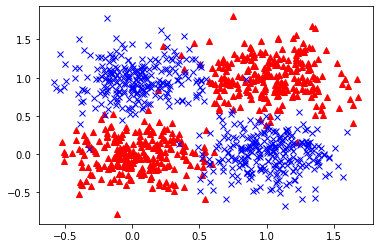

In [111]:
plt.plot(X_0[:,0],X_0[:,1],"r^")
plt.plot(X_1[:,0],X_1[:,1],"bx")
plt.show()

In [112]:
class shallow_neural_network():
    def __init__(self,num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = num_hiddens)
        self.W2 = np.random.normal(size = num_hiddens)
        self.b2 = np.random.normal(size = 1)
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
        
    def predict(self,x):
        z1 = np.matmul(self.W1,x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2,a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1,a1,z2,a2)


In [113]:
model = shallow_neural_network(2,3)

In [114]:
def train(X,Y,model,lr=0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)

    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a2, (z1,a1,z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else : 
            cost -= np.log(1-a2)
        diff = a2-y
        #layer 2
        #db 2
        
        db2+=diff
        dW2 += a1*diff
        db1 += (1-a1**2)*model.W2*diff
        dW1 += numpy.outer((1-a1**2)*model.W2*diff,x)

    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2 /m
    model.b2 -= lr * db2/m
        
    return cost
        

In [115]:
start = time.time()
for epoch in range(500):
    cost = train(X,Y,model,1.0)
    if epoch % 10 == 0:
        print(epoch, cost)
print("time :", time.time() - start)

0 [0.71532427]
10 [0.63008489]
20 [0.58660067]
30 [0.55212391]
40 [0.52846022]
50 [0.51115897]
60 [0.49827408]
70 [0.48849127]
80 [0.48090411]
90 [0.47489618]
100 [0.47004636]
110 [0.46606287]
120 [0.46273983]
130 [0.45992918]
140 [0.4575224]
150 [0.45543844]
160 [0.45361568]
170 [0.45200641]
180 [0.45057299]
190 [0.44928504]
200 [0.44811738]
210 [0.44704832]
220 [0.44605807]
230 [0.4451269]
240 [0.44423248]
250 [0.44334493]
260 [0.44241544]
270 [0.44134517]
280 [0.43987574]
290 [0.43703237]
300 [0.42541929]
310 [0.32567375]
320 [0.26221616]
330 [0.23562289]
340 [0.21851771]
350 [0.20593253]
360 [0.19622833]
370 [0.18860522]
380 [0.18253919]
390 [0.17764988]
400 [0.1736558]
410 [0.17034834]
420 [0.16757287]
430 [0.16521433]
440 [0.16318648]
450 [0.16142415]
460 [0.15987756]
470 [0.15850825]
480 [0.15728617]
490 [0.1561876]
time : 15.857070207595825


In [116]:
model.predict((1,1))[0].item()

0.016106548660784255

In [117]:
model.predict((1,0))[0].item()

0.9662603330826464

In [118]:
model.predict((0,1))[0].item()

0.9962493261078695

In [119]:
model.predict((0,0))[0].item()

0.00921961914065226